<a href="https://colab.research.google.com/github/madonnaojorin/Intro_to_MathBio/blob/main/Parameter_Estimation_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data and the model

Consider the US population (in millions) for eight different years.
* $x = 0$ represents the year 1790 with the population $y = 3.9$.
* We want to ”predict” the population in 1880 ($x=100$).
* Find the ”best fit” model for this data points.



Text(0, 0.5, 'Population (millions)')

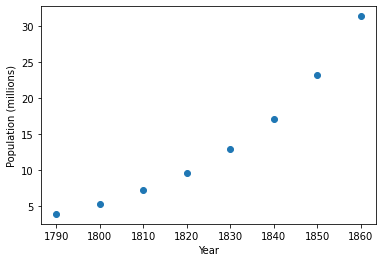

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

Population = [3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4]
Year = [0,10,20,30,40,50,60,70]
plt.scatter(Year, Population)
plt.xticks(Year, [1790,1800,1810,1820,1830,1840,1850,1860])
plt.xlabel('Year')
plt.ylabel('Population (millions)')

We will be looking at a **second-degree polynomial model**, also known as a quadratic equation:
$$ax^2+bx+c=0$$ 
or
$$y=\beta_0+\beta_1x+\beta_2 x^2$$


Using the built-in function, we get the following "best-fit" values for the parameter set. Our goal is to implement Gradient Descent from scratch to validate the values.

poly1d([ 5.36904762e-03, -8.33333333e-04,  4.45833333e+00])

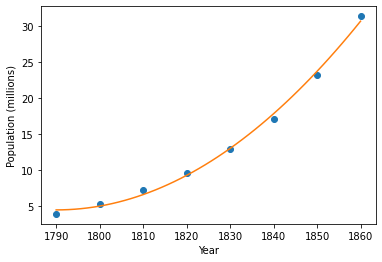

In [3]:
coefficients = np.polyfit(Year, Population, deg=2)
poly = np.poly1d(coefficients)
new_x = np.linspace(Year[0], Year[-1])
new_y = poly(new_x)
plt.plot(Year, Population,"o",new_x,new_y)
plt.xticks(Year, [1790,1800,1810,1820,1830,1840,1850,1860])
plt.xlabel('Year')
plt.ylabel('Population (millions)')
poly

The best-fit parameter values are:
$ \beta_0= 4.46, \beta_1=-0.00083, \beta_2=0.0054$.

#Goal of Gradient Descent — First Steps

The goal of gradient descent is to minimize the error of a model’s prediction, relative to the original data.

The relationship between the independent variable $x$ (Year) and the dependent variable $y$ (Population) is modeled as a second degree polynomial in $x$. Simply put, the coefficients of our second degree polynomial $\beta_0, \beta_1$ and $\beta_2$ will be estimated, evaluated and altered until we can accurately fit a line to the input $x$ data. Gradient descent is the optimization step in this process that alters and improves on the values of these coefficients.



Next, we need an evaluation function for a second degree polynomial, which, given a set of coefficients and a given input $𝑥$ returns the corresponding $𝑦$:

In [4]:
def eval_2nd_degree(coeffs, x):
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y

Let's see the current estimate for 1800 ($x=10$), which should be $y=5.3$ millions.




We will start by choosing coefficients for a second degree polynomial equation:


In [77]:
#coeffs = [5.36904762e-03, -8.33333333e-04,  4.45833333]
coeffs = [0.001,-0.001,4.5]

In [78]:
x=10
eval_2nd_degree(coeffs, x)

4.59

So, the current coefficients are probably not the best.

##First pass at modelling 
The first pass at modelling involves our first guess for parameters of a second degree polynomial ($y=\beta_0+\beta_1x+\beta_2 x^2$). This will be our initial model which will most likely not be that accurate, which we will aim to improve upon until it fits the data well enough.

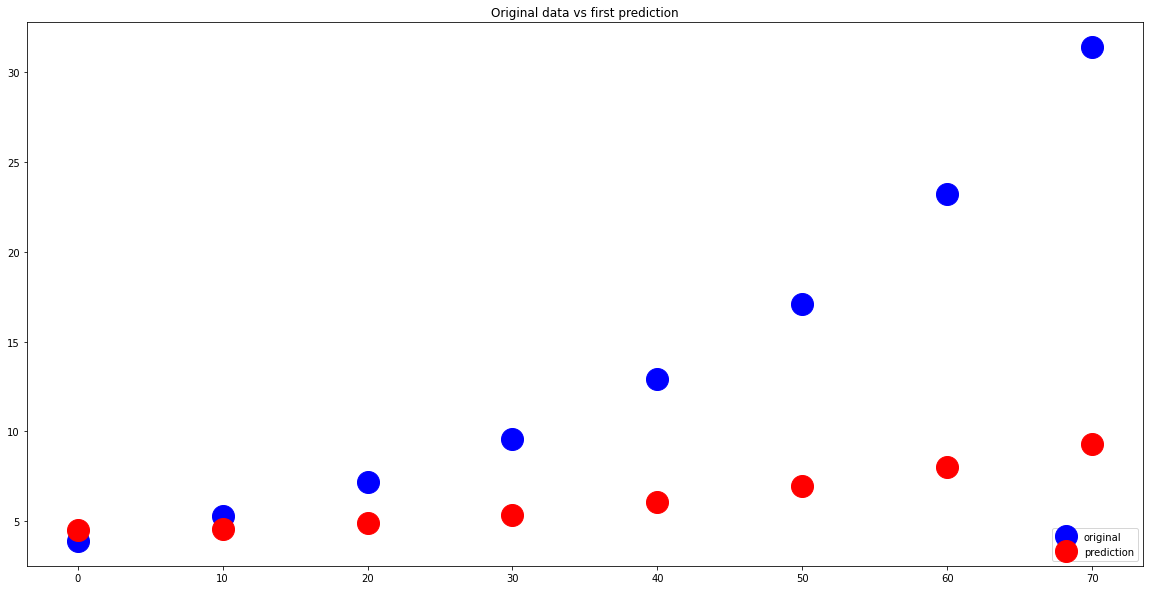

In [79]:
y_bar = eval_2nd_degree(coeffs, np.array(Year))

plt.figure(figsize=(20,10))
plt.plot(Year, Population, 'bo', label = 'original',markersize=22)
plt.plot(Year, y_bar, 'ro', label='prediction',markersize=22)
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

It is evident from the above plot that this new model with random coefficients does not fit our data all that well. To get a quantifiable measure of how incorrect it is, we calculate the Squared Error loss for the model. This is the sum of the squared differences between the actual and predicted outputs:
$$E=\sum_{i=1}^n(y_i-\bar{y_i})^2,$$
where $y_i$ is the actual value and $\bar{y_i}$ is the predicted value.

In [80]:
def loss_mse(y_real, y_bar):
    return sum((y_real - y_bar)*(y_real - y_bar))
  
initial_model_loss = loss_mse(Population, y_bar)
  
initial_model_loss

890.8580000000001

Quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

##Gradient Descent and Loss Reduction
We wish to improve our model, that is, we want to alter its coefficients $\beta_0, \beta_1$ and $\beta_2$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the error function with respect to each of the individual coefficients.

In this case, we are using LSE as our error function — this is the function we wish to calculate partial derivatives for:
$$E=\sum_{i=1}^n(y_i-\bar{y_i})^2$$
With output predictions for our model as:
$$\bar{y}=\beta_0+\beta_1x+\beta_2 x^2$$
Error function can therefore be reformulated as:
$$E=\sum_{i=1}^n(y_i-(\beta_0+\beta_1x+\beta_2 x^2))^2$$

In this specific case, our partial derivatives for that loss function are the following:

* Partial derivative with respect to $\beta_0$:
$$\frac{dE}{d\beta_0}=-2\sum_{i=1}^n(y_i-(\beta_0+\beta_1x+\beta_2 x^2))$$

* Partial derivative with respect to $\beta_1$:
$$\frac{dE}{d\beta_1}=-2\sum_{i=1}^nx_i(y_i-(\beta_0+\beta_1x+\beta_2 x^2))$$

* Partial derivative with respect to $\beta_2$:
$$\frac{dE}{d\beta_2}=-2\sum_{i=1}^nx_i^2(y_i-(\beta_0+\beta_1x+\beta_2 x^2))$$

* If you calculate the value of each derivative, you will obtain the gradient for each coefficient.
* These are the values that give you the slope of the loss function with regards to each specific coefficient.
* They indicate whether you should increase or decrease it to reduce the loss, and also by how much it should be safe to do so.

Given coefficients $\beta_0, \beta_1$ and $\beta_2$, calculated gradients $𝑔_{\beta_0}$, $𝑔_{\beta_1}$and $𝑔_{\beta_2}$ and a learning rate $lr$, typically one would update the coefficients so that their new, updated values are defined as below:

$$\beta_{0_{new}}=\beta_0-lr\times g_{\beta_0}$$
$$\beta_{1_{new}}=\beta_1-lr\times g_{\beta_1}$$
$$\beta_{2_{new}}=\beta_2-lr\times g_{\beta_2}$$

Once you have applied that new model to the data, your loss should have decreased.

##Get that loss down
We need a gradient calculation function which, given a second degree polynomial’s coefficients, as well as a set of inputs $𝑥$ and a corresponding set of actual outputs $𝑦$ will return the respective gradients for each coefficient.

In [81]:
def calc_gradient_2nd_poly(coeffs, x_real, y_real): 
      
    a_s = []
    b_s = []
    c_s = []
    
    
    y_bars = eval_2nd_degree(coeffs, x_real)
    
    for x,y,y_bar in list(zip(x_real, y_real, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2
        partial_a = x_squared * (y-y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
        
    gradient_a = -2 * sum(a_s)
    gradient_b = -2 * sum(b_s)
    gradient_c = -2 * sum(c_s)
    return(gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts


We’re now going to:

* Use the above function to calculate gradients for our first guess,
* Adjust the model’s coefficients accordingly,
* Verify that the model’s loss is now smaller — that G.D. has worked!

Let’s set an initial learning rate to experiment with. This should be kept small to avoid the missing the global minimum, but not so small that it takes forever or gets stuck in a local minimum. $lr = 0.00000001$ is a good place to start.

In [82]:
calc_grad = calc_gradient_2nd_poly(coeffs, np.array(Year), np.array(Population))

lr = 0.00000001
a_new = coeffs[0] - lr * calc_grad[0]
b_new = coeffs[1] - lr * calc_grad[1]
c_new = coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")
print("")

#update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, np.array(Year))
updated_model_loss = loss_mse(np.array(Population), new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (0.00507688, -0.00093168, 4.5000012176)

Now have smaller model loss: 5.928626307561122 vs 890.8580000000001


Visualize this improvement by plotting the training data, original random model and updated lower-loss model together:

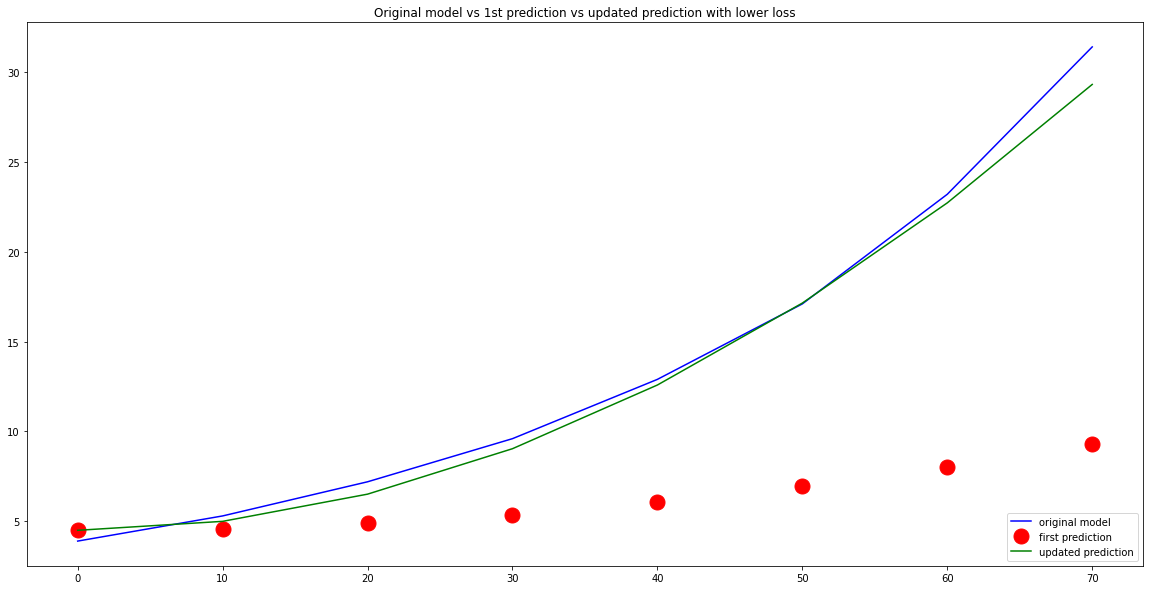

In [94]:
plt.figure(figsize=(20,10))
plt.plot(Year, Population, 'bo', label = 'original model',markersize=15)
plt.plot(Year, y_bar, 'ro', label = 'first prediction',markersize=15)
plt.plot(Year, new_y_bar, 'go', label = 'updated prediction',markersize=15)
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

##Iterative Gradient Descent over many epochs
We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

Let’s improve on the calc_gradient_2nd_poly function from above, to make it more usable for an iterative gradient descent process:

In [84]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    gradient_a = -2 * sum(a_s)
    gradient_b = -2 * sum(b_s)
    gradient_c = -3 * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
    

This will be called as part of the gradient_descent function:



In [85]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, np.array(Year), np.array(Population), lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


Finally, let’s train for 1500 epochs and see if our model has learned anything:



[5.928621699507392, 2.2428724290770936, 2.227521075894078, 2.227457005853993, 2.2274566076684645, 2.227456474682037, 2.2274563428046634, 2.2274562109364062, 2.2274560790727, 2.227455947213501, 2.2274558153588337, 2.2274556835086856, 2.2274555516630516, 2.2274554198219443, 2.2274552879853595, 2.2274551561532836, 2.227455024325734, 2.227454892502716, 2.227454760684191, 2.2274546288702024, 2.227454497060735, 2.227454365255784, 2.2274542334553438, 2.2274541016594283, 2.2274539698680313, 2.2274538380811624, 2.2274537062988, 2.2274535745209505, 2.2274534427476373, 2.227453310978831, 2.2274531792145362, 2.2274530474547647, 2.2274529156995126, 2.227452783948772, 2.2274526522025564, 2.2274525204608593, 2.2274523887236626, 2.2274522569910027, 2.2274521252628463, 2.227451993539209, 2.2274518618200836, 2.2274517301054786, 2.2274515983953984, 2.227451466689806, 2.227451334988764, 2.227451203292218, 2.227451071600196, 2.227450939912687, 2.227450808229687, 2.2274506765512045, 2.227450544877234, 2.227

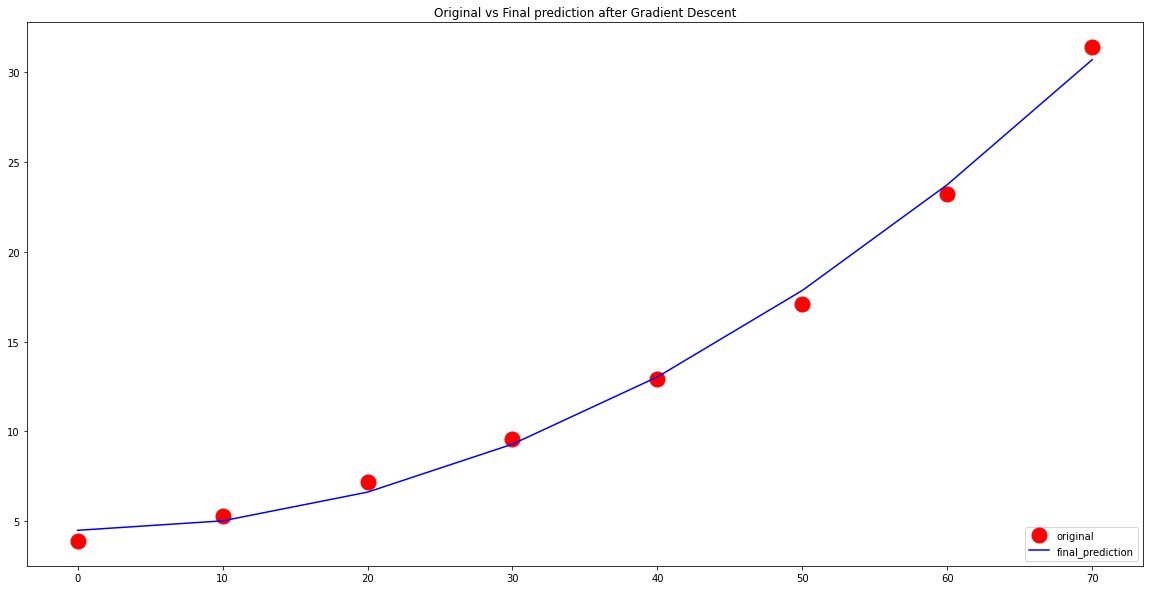

In [93]:
GD = gradient_descent(1500, 0.00000001)

plt.figure(figsize=(20,10))
plt.plot(Year, Population, 'ro', label = 'original',markersize=15)
plt.plot(Year, GD[2], 'b-', label = 'final_prediction',markersize=15)
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $\beta_0, \beta_1$, and $\beta_2$:

In [87]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.0053590393435027995, -0.0009804083578652373, 4.499995062632063)
Original Coefficients: [0.001, -0.001, 4.5]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights:

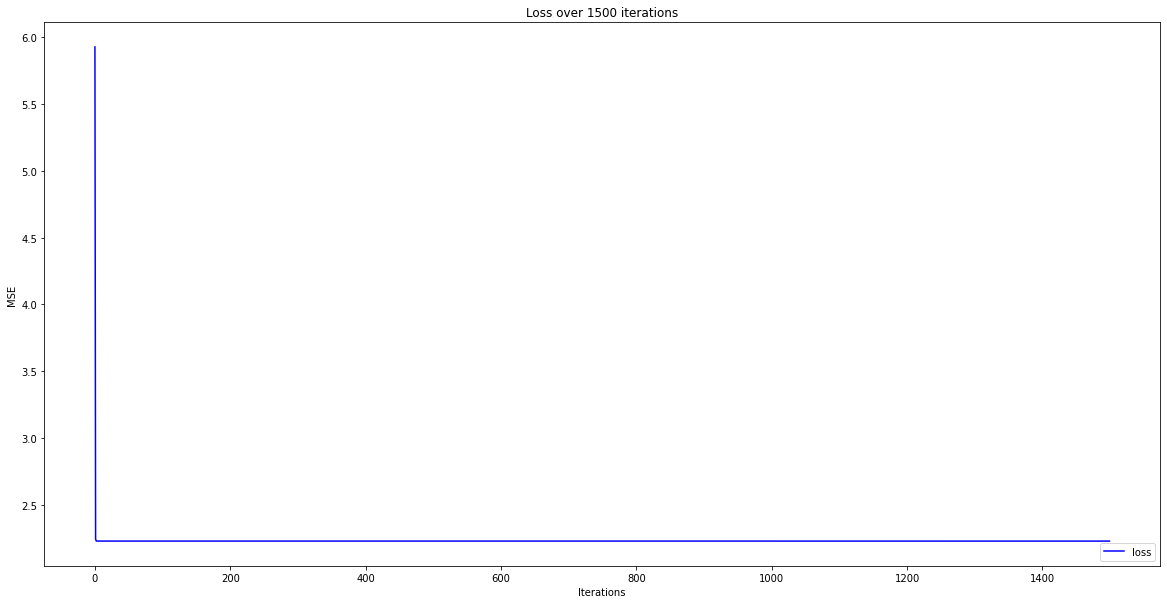

In [95]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

## Compare with the coefficients obtained using the built-in function
Now we revisit the buit-in function to compare the values with the values we got using Gradient Descent.


In [96]:
coefficients = np.polyfit(Year, Population, deg=2)
poly = np.poly1d(coefficients)
poly

poly1d([ 5.36904762e-03, -8.33333333e-04,  4.45833333e+00])

In [98]:
GD[1]

(0.0053590393435027995, -0.0009804083578652373, 4.499995062632063)

In [99]:
poly-GD[1]

poly1d([ 1.00082755e-05,  1.47075025e-04, -4.16617293e-02])

Very small differences for each parameter!

## Verify using the analytical solution
We can also verify this using the analytical solution because our error function is a linear morel.

By substituting the data points into the quadratic polynomial $y=\beta_0+\beta_1x+\beta_2x^2$, we obtain the system of linear equations:

\begin{align*}
\beta_0+0\beta_1+0\beta_2&=3929214\\
\beta_0+10\beta_1+10^2\beta_2&=5308483\\
\beta_0+20\beta_1+20^2\beta_2&=7239881\\
\beta_0+30\beta_1+30^2\beta_2&=9638453\\
\beta_0+40\beta_1+40^2\beta_2&=12866020\\
\beta_0+50\beta_1+50^2\beta_2&=17069453\\
\beta_0+60\beta_1+60^2\beta_2&=23191876\\
\beta_0+70\beta_1+70^2\beta_2&=31443321\\
\end{align*}

This produces the least squares problem
 $A\beta=\textbf{y}$
$$\begin{bmatrix}
1&0&0\\
1&10&10^2\\
1&20&20^2\\
1&30&30^2\\
1&40&40^2\\
1&50&50^2\\
1&60&60^2\\
1&70&70^2\\
\end{bmatrix}\begin{bmatrix}\beta_0\\\beta_1\\\beta_2\end{bmatrix}=\begin{bmatrix}3.9\\5.3\\7.2\\9.6\\12.9\\17.1\\23.2\\31.4\end{bmatrix}$$

Ordinary Least Squares has analytical solution given by:
\begin{align*}
A\beta&=\textbf{b}\\
A^TA\beta&=A^T\textbf{b}\\
\beta&=(A^TA)^{-1}A^T\textbf{b}
\end{align*}


In [120]:
A = np.array([[1,   0,  0],[1, 10, 100], [1, 20, 20**2], [1, 30, 30**2],[1, 40, 40**2],[1, 50, 50**2],[1, 60, 60**2],[1, 70, 70**2]])
y = np.array([3.9,5.3,7.2,9.6,12.9,17.1,23.2,31.4])

In [121]:
A

array([[   1,    0,    0],
       [   1,   10,  100],
       [   1,   20,  400],
       [   1,   30,  900],
       [   1,   40, 1600],
       [   1,   50, 2500],
       [   1,   60, 3600],
       [   1,   70, 4900]])

In [122]:
A.transpose()

array([[   1,    1,    1,    1,    1,    1,    1,    1],
       [   0,   10,   20,   30,   40,   50,   60,   70],
       [   0,  100,  400,  900, 1600, 2500, 3600, 4900]])

In [124]:
ATA = np.dot(A.transpose(), A)

In [125]:
ATy =  np.dot(A.transpose(), y)

In [126]:
ATy

array([1.1060e+02, 5.4460e+03, 3.1282e+05])

In [129]:
from numpy.linalg import inv
np.dot(inv(ATA),ATy)

array([ 4.45833333e+00, -8.33333333e-04,  5.36904762e-03])

Let's summarize the solutions and compare.

|Method |$\beta_0$|$\beta_0$|$\beta_0$|
--------|---------|---------|---------|
|Gradient Descent|4.49999506|-9.80408357e-04|5.35903934350e-03|
|Analytical| 4.45833333|-8.33333333e-04|  5.36904762e-03|
|Built-in|4.45833333|-8.33333333e-04| 5.36904762e-03|


0.0053590393435027995, -0.0009804083578652373, 4.499995062632063